# Assignment 1 Brief 

## Deadline: Tuesday, October 29, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 1 to 5

### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_1_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to express an objective function and its gradients in matrix form.

* Being able to use numpy and pandas to preprocess a dataset.

* Being able to use numpy to build a machine learning pipeline for supervised learning. 


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# Regularisation for Linear Regression

Regularisation is a technique commonly used in Machine Learning to prevent overfitting. It consists on adding terms to the objective function such that the optimisation procedure avoids solutions that just learn the training data. Popular techniques for regularisation in Supervised Learning include Lasso Regression, Ridge Regression and the Elastic Net. 

In this Assignment, you will be looking at Ridge Regression and devising equations to optimise the objective function in Ridge Regression using two methods: a closed-form derivation and the update rules for stochastic gradient descent. You will then use those update rules for making predictions on a Air Quaility dataset.

## Ridge Regression

Let us start with a data set for training $\mathcal{D} = \{\mathbf{y}, \mathbf{X}\}$, where the vector $\mathbf{y}=[y_1, \cdots, y_n]^{\top}$ and $\mathbf{X}$ is the design matrix from Lab 3, this is, 

\begin{align*}
    \mathbf{X} = 
                \begin{bmatrix}
                        1 & x_{1,1} & \cdots & x_{1, D}\\
                        1 & x_{2,1} & \cdots & x_{2, D}\\
                   \vdots &  \vdots\\
                        1 & x_{n,1} & \cdots & x_{n, D}
                \end{bmatrix}
               = 
               \begin{bmatrix}
                      \mathbf{x}_1^{\top}\\
                       \mathbf{x}_2^{\top}\\
                          \vdots\\
                        \mathbf{x}_n^{\top}
                \end{bmatrix}.
\end{align*}

Our predictive model is going to be a linear model

$$ f(\mathbf{x}_i) = \mathbf{w}^{\top}\mathbf{x}_i,$$

where $\mathbf{w} = [w_0\; w_1\; \cdots \; w_D]^{\top}$.

The **objetive function** we are going to use has the following form

$$ J(\mathbf{w}, \alpha) = \frac{1}{n}\sum_{i=1}^n (y_i - f(\mathbf{x}_i))^2 + \frac{\alpha}{2}\sum_{j=0}^D w_j^2,$$

where $\alpha>0$ is known as the *regularisation* parameter.

The first term on the right-hand side (rhs) of the expression for $J(\mathbf{w}, \alpha)$ is very similar to the least-squares objective function we have seen before, for example in Lab 3. The only difference is on the term $\frac{1}{n}$ that we use to normalise the objective with respect to the number of observations in the dataset. 

The first term on the rhs is what we call the "fitting" term whereas the second term in the expression is the regularisation term. Given $\alpha$, the two terms in the expression have different purposes. The first term is looking for a value of $\mathbf{w}$ that leads the squared-errors to zero. While doing this, $\mathbf{w}$ can take any value and lead to a solution that it is only good for the training data but perhaps not for the test data. The second term is regularising the behavior of the first term by driving the $\mathbf{w}$ towards zero. By doing this, it restricts the possible set of values that $\mathbf{w}$ might take according to the first term. The value that we use for $\alpha$ will allow a compromise between a value of $\mathbf{w}$ that exactly fits the data (first term) or a value of $\mathbf{w}$ that does not grow too much (second term).

This type of regularisation has different names: ridge regression, Tikhonov regularisation or $\ell_2$ norm regularisation. 

### Question 1: $J(\mathbf{w}, \alpha)$ in matrix form (2 marks)

Write the expression for $J(\mathbf{w}, \alpha)$ in matrix form. Include ALL the steps necessary to reach the expression.

#### Question 1 Answer

Write your answer to the question in this box.
Beacuse y written in matrix form is
$$
\mathbf{y} = \begin{bmatrix}y_1\\y_2\\ \vdots \\ y_n\end{bmatrix}
$$
And the design metrix is
\begin{align*}
    \mathbf{X} = 
                \begin{bmatrix}
                        1 & x_{1,1} & \cdots & x_{1, D}\\
                        1 & x_{2,1} & \cdots & x_{2, D}\\
                   \vdots &  \vdots\\
                        1 & x_{n,1} & \cdots & x_{n, D}
                \end{bmatrix}
               = 
               \begin{bmatrix}
                      \mathbf{x}_1^{\top}\\
                       \mathbf{x}_2^{\top}\\
                          \vdots\\
                        \mathbf{x}_n^{\top}
                \end{bmatrix}.
\end{align*}
Also, the parameters written in matrix form is 
$\mathbf{w} = [w_0\; w_1\; \cdots \; w_D]^{\top}$,
So we can write the predictive function into
$$
\mathbf{f}(\mathbf{X}; \mathbf{w}) = \begin{bmatrix}f(\mathbf{x}_1; \mathbf{w})\\f(\mathbf{x}_2; \mathbf{w})\\ \vdots \\ f(\mathbf{x}_n; \mathbf{w})\end{bmatrix}.
$$
And the fitting term can be written as $\frac{1}{n}(\mathbf{y} - \mathbf{f})^\top(\mathbf{y} - \mathbf{f})$.
And the L2 regularisation term written in matrix is $\frac{\alpha}{2}\mathbf{w}^\top\mathbf{w}$.
 
So,$$J(\mathbf{w}, \alpha)=\frac{1}{n}(\mathbf{y} - \mathbf{f})^\top(\mathbf{y} - \mathbf{f})+\frac{\alpha}{2}\mathbf{w}^\top\mathbf{w}$$
$$=\frac{1}{n}(\mathbf{y} - \mathbf{X}\mathbf{w})^\top(\mathbf{y} - \mathbf{X}\mathbf{w})+\frac{\alpha}{2}\mathbf{w}^\top\mathbf{w}$$


## Optimising the objective function with respect to $\mathbf{w}$

There are two ways we can optimise the objective function with respect to $\mathbf{w}$. The first one leads to a closed form expression for $\mathbf{w}$ and the second one using an iterative optimisation procedure that updates the value of $\mathbf{w}$ at each iteration by using the gradient of the objective function with respect to $\mathbf{w}$,
$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta \frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}},
$$
where $\eta$ is the *learning rate* parameter and $\frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}}$ is the gradient of the objective function.

### Question 2: Derivative of $J(\mathbf{w}, \alpha)$ wrt $\mathbf{w}$ (2 marks)

Find the closed-form expression for $\mathbf{w}$ by taking the derivative of $J(\mathbf{w}, \alpha)$ with respect to 
$\mathbf{w}$, equating to zero and solving for $\mathbf{w}$. Write the expression in matrix form. 

Also, write down the specific update rule for $\mathbf{w}_{\text{new}}$ by using the equation above.

#### Question 2 Answer

Write your answer to the question in this box.
$$
$$
Beacuse
$$J(\mathbf{w}, \alpha)=\frac{1}{n}(\mathbf{y} - \mathbf{X}\mathbf{w})^\top(\mathbf{y} - \mathbf{X}\mathbf{w})+\frac{\alpha}{2}\mathbf{w}^\top\mathbf{w}
$$
$$= \frac{1}{n}(\mathbf{y}^\top\mathbf{y} - 2\mathbf{y}^\top\mathbf{X}\mathbf{w} + \mathbf{w}^\top\mathbf{X}^\top\mathbf{X}\mathbf{w})+\frac{\alpha}{2}\mathbf{w}^\top\mathbf{w}
$$
So,
$$
\frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}}=-\frac{1}{n}(2\mathbf{X}^\top \mathbf{y} - 2\mathbf{X}^\top\mathbf{X}\mathbf{w})+\alpha\mathbf{w}
$$
When the derivative is Zero,
$$
0=-\frac{1}{n}(2\mathbf{X}^\top \mathbf{y} - 2\mathbf{X}^\top\mathbf{X}\mathbf{w})+\alpha\mathbf{w}
$$
So,
$$
\mathbf{w} = (\mathbf{X}^\top\mathbf{X}+\frac{n}{2}\alpha\mathbf{I})^{-1}\mathbf{X}^\top\mathbf{y}
$$
Also,
$$
\mathbf{w}_{new} =\mathbf{w}_{old} +\frac{\eta}{n}(2\mathbf{X}^\top \mathbf{y} - 2\mathbf{X}^\top\mathbf{X}\mathbf{w})-\eta\alpha\mathbf{w}
$$

# Using ridge regression to predict air quality

Our dataset comes from a popular machine learning repository that hosts open source datasets for educational and research purposes, the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We are going to use ridge regression for predicting air quality. The description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Air+Quality).

In [ ]:
import pods
pods.util.download_url('https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip')
import zipfile
zip = zipfile.ZipFile('./AirQualityUCI.zip', 'r')
for name in zip.namelist():
    zip.extract(name, '.')

In [4]:
# The .csv version of the file has some typing issues, so we use the excel version
import pandas as pd 
import numpy as np
import pylab as plt
air_quality = pd.read_excel('./air_quality_dataSet/AirQualityUCI.xlsx', usecols=range(2,15))

We can see some of the rows in the dataset 

In [5]:
air_quality.sample(5)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
2364,1.3,966.25,-200,9.286931,950.50,123.0,812.25,77.0,1734.75,995.50,18.275,60.750,1.263505
4037,1.5,954.25,-200,6.952473,854.75,89.0,791.75,94.0,1474.00,745.25,25.200,40.750,1.287664
694,1.9,1084.75,209,10.721628,1004.25,106.0,887.50,95.0,1453.75,815.50,21.025,25.450,0.626435
6415,2.6,1194.25,-200,9.280464,950.25,434.0,667.00,100.0,1433.00,1043.00,14.400,82.725,1.349603
2435,1.0,-200.00,-200,-200.000000,-200.00,40.0,-200.00,60.0,-200.00,-200.00,-200.000,-200.000,-200.000000


The target variable corresponds to the CO(GT) variable of the first column. The following columns correspond to the variables in the feature vectors, *e.g.*, PT08.S1(CO) is $x_1$ up until AH which is $x_D$. The original dataset also has a date and a time columns that we are not going to use in this assignment.

Before designing our predictive model, we need to think about three stages: the preprocessing stage, the training stage and the validation stage. The three stages are interconnected and *it is important to remember that the testing data that we use for validation has to be set aside before preprocessing*. Any preprocessing that you do has to be done only on the training data and several key statistics need to be saved for the test stage.

Separating the dataset into training and test before any preprocessing has happened help us to recreate the real world scenario where we will deploy our system and for which the data will come without any preprocessing.

We are going to use *hold-out validation* for testing our predictive model so we need to separate the dataset into a training set and a test set.

### Question 3: Splitting the dataset (1 mark)

Split the dataset into a training set and a test set. The training set should have 70% of the total observations and the test set, the 30%. For making the random selection make sure that you use a random seed that corresponds to the last five digits of your student UCard. Make sure that you comment your code.

#### Question 3 Answer

In [7]:
# Write your code here

#random seed
MyStudentID = 86166
np.random.seed(MyStudentID)
#number of data & number of attributes
n_data = air_quality.shape[0]
n_columns = air_quality.shape[1]
#disorder the data
indexes_data = np.random.permutation(n_data)
#get the number of training_set & Validation_set
n_training_set = int(n_data*0.7)
n_test_set = n_data - n_training_set
temp = np.empty((n_training_set,n_columns))
# data attributes
column_data = air_quality.columns
#get training set
for i in range(n_training_set):
    temp[i][:] = air_quality.iloc[indexes_data[i]]
    # print(temp[i])
training_set = pd.DataFrame(temp)
training_set.columns = column_data
#get validation set
temp = np.empty((n_test_set,n_columns))
for i in range(n_training_set,n_data):
    temp[i-n_training_set][:] = air_quality.iloc[indexes_data[i]]
test_set = pd.DataFrame(temp)
test_set.columns = column_data

## Preprocessing the data

The dataset has missing values tagged with a -200 value. Before doing any work with the training data, we want to make sure that we deal properly with the missing values. 

### Question 4: Missing values (3 marks)

Make some exploratory analysis on the number of missing values per column in the training data. 

* Remove the rows for which the target feature has missing values. We are doing supervised learning so we need all our data observations to have known target values.

* Remove features with more than 20% of missing values. For all the other features with missing values, use the mean value of the non-missing values for imputation.

#### Question 4 Answer

In [8]:
# Write your code here

drop_criterion = int(0.2*n_training_set)
#preprocess training set
#drop columns with more than 20% missing values
for j in column_data:
    counter_missing_per_data = 0;
    if(j=='CO(GT)'):
        continue
    for i in range(n_training_set):
        if(training_set[j][i]==-200):
            counter_missing_per_data += 1
        if(counter_missing_per_data>=drop_criterion):
            training_set = training_set.drop(j,axis=1)
            drop_column = j
            print("Drop column: ",drop_column)
            break

#update column data
column_data = training_set.columns

#drop rows with missing labels
for i in range(n_training_set):
    if (training_set["CO(GT)"][i] == -200):
        training_set = training_set.drop([i])

#update training set number and index
n_training_set = training_set.shape[0]
training_set.index = range(n_training_set)

#get fixed value for every column's missing value
fixed_value = {}
for j in column_data:
    counter = 0
    sum = 0
    for i in range(n_training_set):
        if(training_set[j][i]!=-200):
            sum += training_set[j][i]
            counter += 1
    fixed_value[j]=sum/counter

#fix Nan value
for i in range(n_training_set):
    for j in column_data:
        if(training_set[j][i]==-200):
            training_set[j][i]=fixed_value[j]

Drop column:  NMHC(GT)


### Question 5: Normalising the training data (2 marks)

Now that you have removed the missing data, we need to normalise the input vectors. 

* Explain in a sentence why do you need to normalise the input features for this dataset.

* Normalise the training data by substracting the mean value for each feature and dividing the result by the standard deviation of each feature. Keep the mean values and standard deviations, you will need them at test time.

#### Question 5 Answer

Write your explanation in this box
$$
$$
A:Beacuse normalisation can change the value of date in the dataset to a common scale without distorting differences in the ranges of values and then it can save the training time and can even improve the precision of some models.

In [9]:
# Write your code here
#question5- Normalisation of training set except the objective variable
mean_value_per_column = {}
std_value_per_column = {}
for j in column_data:
    if(j=="CO(GT)"):
        continue
    # get mean value and std for every column in training set
    mean_value_per_column[j] = training_set[j].mean()
    std_value_per_column[j] = training_set[j].std()
    # normalize training set
    training_set[j] = (training_set[j] - mean_value_per_column[j]) / std_value_per_column[j]

## Training and validation stages

We have now curated our training data by removing data observations and features with a large amount of missing values. We have also normalised the feature vectors. We are now in a good position to work on developing the prediction model and validating it. We will use both the closed form expression for $\mathbf{w}$ and gradient descent for iterative optimisation. 

We first organise the dataframe into the vector of targets $\mathbf{y}$ and the design matrix $\mathbf{X}$.

In [10]:
# Write your code here to get y and X

#get objective variable
y = training_set.loc[:,column_data[0]]
#get feature  variables
#get design metrix
first_column = [1 for i in range(n_training_set)]
training_set.insert(1,"W0",first_column)
#update column data
column_data = training_set.columns
X = training_set.loc[:,column_data[1]:column_data[12]]

### Question 6: training with closed form expression for $\mathbf{w}$ (3 marks)

To find the optimal value of $\mathbf{w}$ using the closed form expression that you derived before, we need to know the value of the regularisation parameter $\alpha$ in advance. We will determine the value by using part of the training data for finding the parameters $\mathbf{w}$ and another part of the training data to choose the best $\alpha$ from a set of predefined values.

* Use `np.log(start, stop, num)` to create a set of values for $\alpha$ in log scale. Use the following parameters `start=-3`, `stop=2` and `num=20`. 

* Randomly split the training data into what is properly called the training set and the validation set. As before, make sure that you use a random seed that corresponds to the last five digits of your student UCard. Use 70% of the data for the training set and 30% of the data for the validation set.

* For each value that you have for $\alpha$ from the previous step, use the training set to compute $\mathbf{w}$ and then measure the mean-squared error (MSE) over the validation data. After this, you will have `num=20` MSE values. Choose the value of $\alpha$ that leads to the lower MSE and save it. You will use it at the test stage.

* What was the best value of $\alpha$? Is there any explanation for that?

#### Question 6 Answer

In [20]:
# Write your code here
#get a set of values for alpha
alpha = np.logspace(-3,2,20)
#split training data in to training set and validation set
n_training = int(n_training_set*0.7)
n_validation = n_training_set - n_training
#get random indexes
indexes_data_for_X_and_y = np.random.permutation(n_training_set)
#split X
#get X_training
temp = np.empty((n_training,n_columns-1))
for i in range(n_training):
    temp[i][:] = X.iloc[indexes_data_for_X_and_y[i]]
X_training = pd.DataFrame(temp)
#get X_validation
temp = np.empty((n_validation,n_columns-1))
for i in range(n_training,n_training_set):
    temp[i-n_training][:] = X.iloc[indexes_data_for_X_and_y[i]]
X_validation = pd.DataFrame(temp)
#split y
#get y_training
temp = np.empty((n_training,1))
for i in range(n_training):
    temp[i][:] = y.iloc[indexes_data_for_X_and_y[i]]
y_training = pd.DataFrame(temp)
#get y_validation
temp = np.empty((n_validation,1))
for i in range(n_training,n_training_set):
    temp[i-n_training][:] = y.iloc[indexes_data_for_X_and_y[i]]
y_validation = pd.DataFrame(temp)

#training
temp_w = np.empty((len(alpha),n_columns-1))
for i in range(len(alpha)):
    for j in range(n_columns-1):
        temp_w[i][j] = (np.linalg.solve(2*np.dot(X_training.T, X_training)+n_training*alpha[i], 2*np.dot(X_training.T, y_training)))[j]
#w is a metrix contains parameter vectors with different alpha values
w = pd.DataFrame(temp_w)    
mse_for_alpha = []
#validate the best alpha value on validation set
for i in range(len(alpha)):
    mse_for_alpha.append((np.dot(y_validation[0] - np.dot(w.iloc[i],X_validation.T), y_validation[0] - np.dot(w.iloc[i],X_validation.T).T))/n_validation)
alpha_min_mse_index = mse_for_alpha.index(min(mse_for_alpha))
alpha_best = alpha[alpha_min_mse_index]

Write your answer to the last question here.
$$
$$
A:The best value for $\alpha$ is 0.001. The reason for the value is that beacuse at this time the residual error is high and therefore the value of the regularisation term is small. Which means the values of $\mathbf{w}$ are not good.

### Question 7: validation with the closed form expression for $\mathbf{w}$ (2 marks)

We are going to deal now with the test data to perform the validation of the model. Remember that the test data might also contain missing values in the target variable and in the input features.

* Remove the rows of the test data for which the labels have missing values. 
* If you remove any feature at the training stage, you also need to remove the same features from the test stage.
* Replace the missing values on each feature variables with the mean value you computed in the training data.
* Normalise the test data using the means and standard deviations computed from the training data
* Compute again $\mathbf{w}$ for the value of $\alpha$ that best performed on the validation set using ALL the training data (not all the training set).
* Report the MSE on the preprocessed test data and an histogram with the absolute error.
* Does the regularisation have any effect on the model? Explain your answer.

#### Question 7 Answer

MSE on test set:
0.21912730382976883


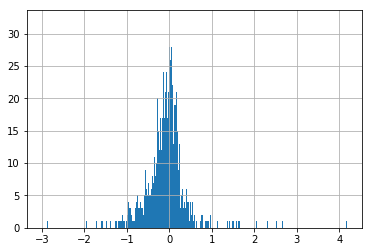

In [13]:
# Write your code here
#preprocess test set
#drop the same column in test set
test_set = test_set.drop(drop_column,axis=1)

#drop rows with missing labels
for i in range(n_test_set):
    if (test_set["CO(GT)"][i] == -200):
        test_set = test_set.drop([i])

#update test set number and index
n_test_set = test_set.shape[0]
test_set.index = range(n_test_set)

#fix Nan value
column_data = test_set.columns
for i in range(n_test_set):
    for j in column_data:
        if(test_set[j][i]==-200):
            test_set[j][i]=fixed_value[j]

#get design metrix for test set
first_column = [1 for i in range(n_test_set)]   #create a list in line
test_set.insert(1,"W0",first_column)
column_data = test_set.columns

#Normalisation of test set
mean_value_per_column = {}
std_value_per_column = {}
for j in column_data:
    # get mean value and std for every column in training set
    if (j == "CO(GT)" or j == "W0"):
        continue
    mean_value_per_column[j] = test_set[j].mean()
    std_value_per_column[j] = test_set[j].std()
    # normalize training set
    test_set[j] = (test_set[j] - mean_value_per_column[j]) / std_value_per_column[j]
# print(test_set.std())

#training with all training data
temp_w = np.empty((len(alpha),n_columns-1))
for i in range(len(alpha)):
    for j in range(n_columns-1):
        temp_w[i][j] = (np.linalg.solve(2*np.dot(X.T, X) + n_training_set*alpha[i]*np.identity(n_columns-1), 2*np.dot(X.T, y)))[j]
w = pd.DataFrame(temp_w)

#mse on test set
#get objective variable of test set
y_test_series = test_set.loc[:,column_data[0]]
y_test = pd.DataFrame(y_test_series)
#get feature  variables of test set
X_test = test_set.loc[:,column_data[1]:column_data[12]]
#get mse
mse_test_set = ((np.dot(y_test[column_data[0]] - np.dot(w.iloc[alpha_min_mse_index],X_test.T), y_test[column_data[0]] - np.dot(w.iloc[alpha_min_mse_index],X_test.T).T))/n_test_set)
print("MSE on test set:")
print(mse_test_set)
#get absolute error
(y_test[column_data[0]] - np.dot(X_test, w.iloc[alpha_min_mse_index])).hist(bins=1000)
plt.show()

Write the explanation to your answer here.

## Question 8: training with gradient descent and validation (5 marks)


Use gradient descent to iteratively compute the value of $\mathbf{w}_{\text{new}}$. Instead of using all the training set to compute the gradient, use a subset of $B$ datapoints in the training set. This is sometimes called minibatch gradient descent where $B$ is the size of the minibacth. When using gradient descent with minibatches, you need to find the best values for three parameters: $\eta$, the learning rate, $B$, the number of datapoints in the minibatch and $\alpha$, the regularisation parameter.

* As you did on Question 6, create a grid of values for the parameters $\alpha$ and $\eta$ using `np.logspace` and a grid of values for $B$ using np.linspace. Because you need to find 
 three parameters, start with `num=5` and see if you can increase it.

* Use the same training set and validation set that you used in Question 6.

* For each value that you have of $\alpha$, $\eta$ and $B$ from the previous step, use the training set to compute $\mathbf{w}$ using minibatch gradient descent and then measure the MSE over the validation data. For the minibatch gradient descent choose to stop the iterative procedure after $500$ iterations.

* Choose the values of $\alpha$, $\eta$ and $B$ that lead to the lower MSE and save them. You will use them at the test stage.

*3 marks of out of the 5 marks*


* Use the test set from Question 7 and provide the MSE obtained by having used minibatch training with the best values for $\alpha$, $\eta$ and $B$ over the WHOLE training data (not only the training set).

* Compare the performance of the closed form solution and the minibatch solution. Are the performances similar? Are the parameters $\mathbf{w}$ and $\alpha$ similar in both approaches? Please comment on both questions.

*2 marks of out of the 5 marks*

#### Question 8 Answer

In [ ]:
# Write the code for your answer here

Write the answer to your last question here.